In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


In [3]:
# Set up directories for training and testing
train_dir = "D:/BRAIN TUMOR PREDICTION/Training"
test_dir = "D:/BRAIN TUMOR PREDICTION/Testing"


In [5]:
# Image dimensions
img_width, img_height = 150, 150  # Resize images to 150x150


In [7]:
# Data Preprocessing for Training and Test Data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Random rotations for augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalize the test data


In [9]:
# Flow the data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')  # For multi-class classification

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [11]:
# Build the CNN Model
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D(2, 2),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    # Flatten the output for dense layer
    layers.Flatten(),
    
    # Fully connected layers
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(4, activation='softmax')  # 4 categories
])


C:\Users\augus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [15]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)


C:\Users\augus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.3435 - loss: 1.4358

C:\Users\augus\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 41s 413ms/step - accuracy: 0.3439 - loss: 1.4345 - val_accuracy: 0.2183 - val_loss: 1.9008
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 413ms/step - accuracy: 0.4568 - loss: 1.1868 - val_accuracy: 0.2614 - val_loss: 3.6222
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 411ms/step - accuracy: 0.5308 - loss: 1.0713 - val_accuracy: 0.3528 - val_loss: 2.7467
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 424ms/step - accuracy: 0.5535 - loss: 0.9776 - val_accuracy: 0.2944 - val_loss: 4.1259
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 39s 427ms/step - accuracy: 0.5939 - loss: 0.9317 - val_accuracy: 0.3629 - val_loss: 3.2413
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 424ms/step - accuracy: 0.6215 - loss: 0.8989 - val_accuracy: 0.3782 - val_loss: 3.3976
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 419ms/step - accuracy: 0.6541 - loss: 0.8094 - val_accuracy: 0.3909 - val_loss: 3.2871
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 425ms/step - accuracy: 0.6407 - loss: 0.8278 - val_accuracy: 0.360

In [17]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.4293 - loss: 4.1594
Test accuracy: 39.34%


In [25]:
# Save the trained model in the specified directory
model.save('D:/BRAIN TUMOR PREDICTION/brain_tumor_model.h5')


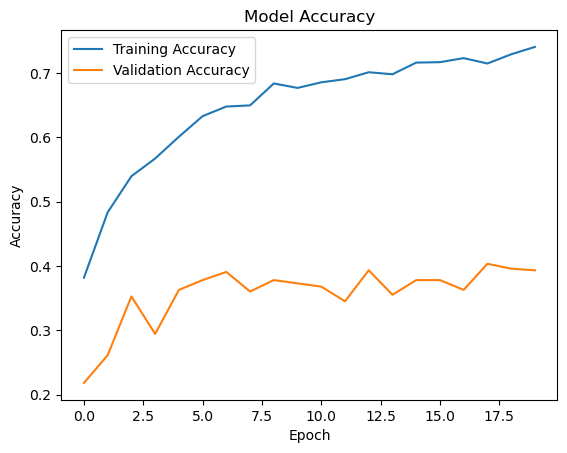

In [21]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


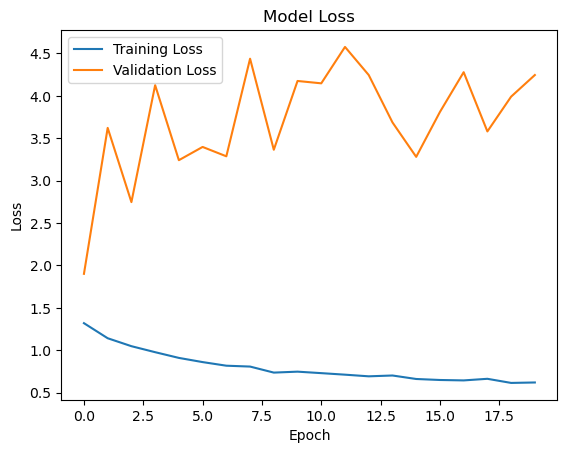

In [23]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

